# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.3.1


In [3]:
df = pd.read_csv("data/US_Crime_Rates_1960_2014.csv")
df

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [4]:
df.set_index("Year", inplace=True)


&lt;matplotlib.axes._subplots.AxesSubplot at 0x205566c04e0&gt;

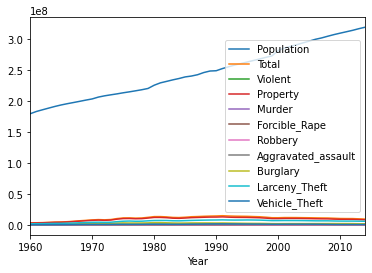

In [5]:
df.plot()

In [6]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(11)
memory usage: 5.2 KB


In [7]:
df.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype=&#39;int64&#39;, name=&#39;Year&#39;)

In [8]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [10]:
df_crime = df

In [24]:
df_crime.reset_index(inplace=True)

In [26]:
df_crime.drop(columns=["index"], inplace=True)
df_crime

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [28]:
train_dataset = df_crime[df_crime["Year"]<=2010]
test_dataset = df_crime[df_crime["Year"]>2010]

In [29]:
train_dataset

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [30]:
train_dataset.shape, test_dataset.shape

((51, 12), (4, 12))

In [31]:
# Murder  = Variable a predecir (target)
train_labels = train_dataset.pop('Murder')
test_labels = test_dataset.pop('Murder')

In [32]:
train_dataset.shape, train_labels.shape, test_dataset.shape, test_labels.shape


((51, 11), (51,), (4, 11), (4,))

Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?


Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados?
Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?

In [98]:
# Dos Capas con 64 neuronas cada una. La capa de salida tiene un solo valor (corresponde al Murder a predecir)
def build_model(activation, optimizer):
  model = keras.Sequential([
    layers.Dense(32, input_shape=[len(train_dataset.keys())], activation=activation),
    layers.Dense(32, activation=activation),
    layers.Dense(64, activation=activation),
    layers.Dense(1)
  ])

  optimizer1 = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  optimizer2 = "adam"
  optimizer3 = "SGD"
  optimizer4 = "Adadelta"

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [99]:
model = build_model(activation="relu", optimizer="adam")
model1 = build_model(activation="sigmoid", optimizer="Adadelta")

In [95]:
# Revisión del modelo
model.summary()

Model: &quot;sequential_7&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [96]:
### Entrenamiento del modelo (epochs). Se registra la precisión del modelo en el objeto history
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('ñ', end='')


In [101]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = model1.fit(train_dataset.values, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])


ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

In [93]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,6.080743e+10,217137.968750,6.080743e+10,5.745471e+10,231972.359375,5.745471e+10,0
1,6.023133e+10,214747.171875,6.023133e+10,6.056841e+10,238545.093750,6.056841e+10,1
2,6.002967e+10,213493.781250,6.002967e+10,6.036870e+10,238128.734375,6.036870e+10,2
3,6.000013e+10,213370.968750,6.000013e+10,6.118078e+10,239818.906250,6.118078e+10,3
4,5.990989e+10,213072.468750,5.990989e+10,6.455015e+10,246696.000000,6.455015e+10,4
5,5.970619e+10,211573.078125,5.970619e+10,6.641350e+10,250420.000000,6.641350e+10,5
6,5.961335e+10,210857.468750,5.961335e+10,6.875691e+10,255025.453125,6.875691e+10,6
7,5.957924e+10,210089.375000,5.957924e+10,7.357557e+10,264246.531250,7.357557e+10,7
8,5.947555e+10,207938.078125,5.947555e+10,7.066496e+10,258717.812500,7.066496e+10,8
9,5.952949e+10,209352.781250,5.952949e+10,7.596524e+10,268702.531250,7.596524e+10,9


In [103]:
import matplotlib.pyplot as plt


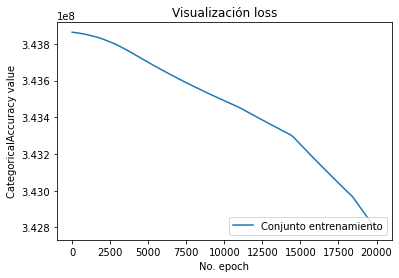

In [108]:
# Visualización del modelo:
plt.plot(history.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_loss'], label='validation)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [109]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Murder".format(mae))

1/1 - 0s - loss: 2142257545216.0000 - mae: 1463202.2500 - mse: 2142257545216.0000
Testing set Mean Abs Error: 1463202.25 Murder


In [110]:
df_resultado = pd.DataFrame({'optim':["rmseprom"], 'capas': ["32 32 64 1"],'activ': ["linear"] ,'epoch': [200], 'loss': [loss], 'mae': [mae], 'mse' :[mse]})

In [111]:
df_resultado = df_resultado.append({'optim' : 'Adam' , 'capas' : "32 32 64 1", 'activ' : 'tanh', 'epoch':200, 'loss': loss, 'mae': mae, 'mse' :mse}, ignore_index=True)
df_resultado

,optim,capas,activ,epoch,loss,mae,mse
0,rmseprom,32 32 64 1,linear,200,2.142258e+12,1463202.25,2.142258e+12
1,Adam,32 32 64 1,tanh,200,2.142258e+12,1463202.25,2.142258e+12


In [112]:
test_dataset

,Year,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
51,2011,311587816,10258774,1206031,9052743,84175,354772,752423,2185140,6151095,716508
52,2012,313873685,10219059,1217067,9001992,85141,355051,762009,2109932,6168874,723186
53,2013,316497531,9850445,1199684,8650761,82109,345095,726575,1931835,6018632,700294
54,2014,318857056,9475816,1197987,8277829,84041,325802,741291,1729806,5858496,689527


In [113]:
df_resultado

,optim,capas,activ,epoch,loss,mae,mse
0,rmseprom,32 32 64 1,linear,200,2.142258e+12,1463202.25,2.142258e+12
1,Adam,32 32 64 1,tanh,200,2.142258e+12,1463202.25,2.142258e+12


(14218.149999999998, 111716.65, -1487178.7499999998, -1389680.2499999998)

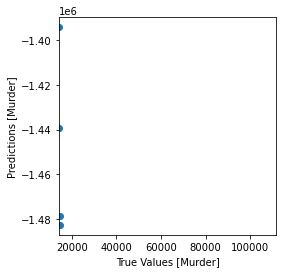

In [114]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Murder]')
plt.ylabel('Predictions [Murder]')
plt.axis('equal')
plt.axis('square')


In [115]:
test_labels, test_predictions

(51    14661
 52    14866
 53    14319
 54    14249
 Name: Murder, dtype: int64,
 array([-1482747., -1478616., -1439239., -1394112.], dtype=float32))

51   -1497408.0
52   -1493482.0
53   -1453558.0
54   -1408361.0
Name: Murder, dtype: float64

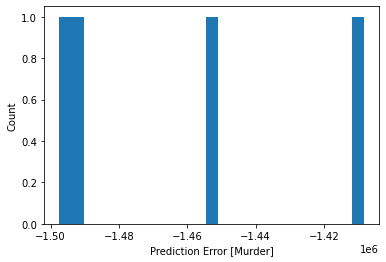

In [117]:
test_predictions = model.predict(test_dataset).flatten()
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Murder]")
_ = plt.ylabel("Count")
error

### ==========================================================================================

In [ ]:
Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)

In [140]:

def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(90, activation='relu'),
    layers.Dense(60, activation='sigmoid'),
    layers.Dense(32, activation='relu'), 
    layers.Dense(40, activation='relu'), 
    layers.Dense(40, activation='sigmoid'), 
    layers.Dense(40000, activation='relu'), 
    layers.Dense(1, activation='linear')
  ])

  # Prueba con distintos optimizadores ("rmsprop", "adam", "SGD", "Adadelta")  
  optimizer = "RMSprop"
  optimizer2 = "adam"

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [141]:
model = build_model()
model.summary()

Model: &quot;sequential_13&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_65 (Dense)             (None, 90)                2970      
_________________________________________________________________
dense_66 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1952      
_________________________________________________________________
dense_68 (Dense)             (None, 40)                1320      
_________________________________________________________________
dense_69 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_70 (Dense)             (None, 40000) 

In [142]:
EPOCHS = 200
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


ñññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

In [144]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Murder".format(mae))

1/1 - 0s - loss: 10021241.0000 - mae: 3155.6133 - mse: 10021241.0000
Testing set Mean Abs Error: 3155.61 Murder


In [145]:
df_resultado = df_resultado.append({'optim' : 'adam' , 'capas' : "17,9,4,16,4,4,4,1", 'activ' : 'linear', 'epoch':200, 'loss': loss, 'mae': mae, 'mse' :mse}, ignore_index=True)

In [146]:
df_resultado

,optim,capas,activ,epoch,loss,mae,mse
0,rmseprom,32 32 64 1,linear,200,2.142258e+12,1.463202e+06,2.142258e+12
1,Adam,32 32 64 1,tanh,200,2.142258e+12,1.463202e+06,2.142258e+12
2,adam,"17,9,4,16,4,4,4,1",linear,200,2.109908e+08,1.452334e+04,2.109908e+08
3,adam,"17,9,4,16,4,4,4,1",linear,200,2.093303e+08,1.446606e+04,2.093303e+08
4,adam,"17,9,4,16,4,4,4,1",linear,200,1.538127e+12,1.240152e+06,1.538127e+12
5,adam,"17,9,4,16,4,4,4,1",linear,200,1.002124e+07,3.155613e+03,1.002124e+07


array([17679.365, 17679.365, 17679.365, 17679.365], dtype=float32)

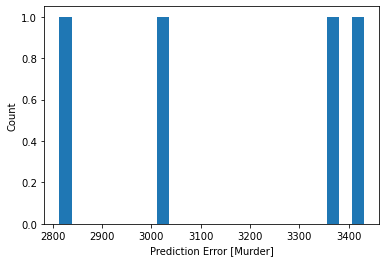

In [147]:
test_predictions = model.predict(test_dataset).flatten()
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Murder]")
_ = plt.ylabel("Count")
test_predictions

Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?

https://stackoverflow.com/questions/43396572/dimension-of-shape-in-conv1d/43399308

### Explicación de dimensiones en conv1D

- num_features == tiene que ser el número de variables (10)

- dims == número de dimensiones de cada variable (1)

- input_shape=(num_features, dims))

In [151]:
X_train.shape

(40, 11)

In [ ]:
# El None representa el número de datos que vamos a entrenar por cada
batch_input_shape=(None,11,1)

In [154]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(input_shape=(11, 1), filters=8, kernel_size=(3), activation="relu", padding="valid"))
    model.add(keras.layers.Conv1D(filters=8, kernel_size=(3), activation="relu", padding="valid"))
    model.add(keras.layers.Dense(1, activation='linear'))
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer2 = "adam"
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model

In [155]:
train_dataset.shape

(51, 11)

In [156]:
len(df.columns)

12

In [171]:
import numpy as np
model = build_model()
EPOCHS = 200
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# El axis va a especificar la dimensión en la que se va a situar la dimensión 1, que representa el número de "trozos" de datos.
X = np.expand_dims(X_train, axis=2)
X.shape

(40, 11, 1)

In [161]:
X_train.shape

(40, 11)

In [172]:
#Si lo quiero entrenar con todos los datos hasta el 2009
history = model.fit(X, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
model.summary()

ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññModel: &quot;sequential_23&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 9, 8)              32        
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 7, 8)              200       
_________________________________________________________________
dense_81 (Dense)             (None, 7, 1)              9         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
